In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [165]:
# Load the data
df_edu = pd.read_csv('/content/summit_benchmark_CLEAN.csv')  # Replace with your actual file name

print("✅ Data loaded successfully!")
print(f"📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

✅ Data loaded successfully!
📊 Dataset Shape: 111 rows × 13 columns


In [166]:
# View first few rows
print("\n=== FIRST 5 ROWS ===")
print(df_edu.head())

# View last few rows
print("\n=== LAST 5 ROWS ===")
print(df_edu.tail())

# Random sample
print("\n=== RANDOM SAMPLE (10 rows) ===")
print(df_edu.sample(10))


=== FIRST 5 ROWS ===
   student_id  MOC school_year  season  rc_score  rc_percentile  \
0        1024  1.1     2023-24  Winter      0.58           66.0   
1        1024  1.2     2023-24  Spring      0.71           71.0   
2        1024  2.0     2024-25    Fall      0.67           78.0   
3        1024  2.1     2024-25  Winter      0.50           62.0   
4        1024  2.2     2024-25  Spring      0.50           51.0   

   composite_percentile  vocab_score  fluency_score  \
0                  59.0         41.0            NaN   
1                  63.0         34.0            NaN   
2                  76.0          NaN            NaN   
3                  72.0         60.0            NaN   
4                  60.0         42.0            NaN   

                                         file_source              sheet_name  \
0     Hackathon_SY 23-24 Aimsweb Benchmark Data.xlsx  Winter 24 gr 6 reading   
1     Hackathon_SY 23-24 Aimsweb Benchmark Data.xlsx          Spring 24 Gr 6   
2  H

# STEP 2: Understanding Data Structure

In [167]:
print("\n=== DATASET INFO ===")
df_edu.info()


=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            111 non-null    int64  
 1   MOC                   111 non-null    float64
 2   school_year           111 non-null    object 
 3   season                111 non-null    object 
 4   rc_score              96 non-null     float64
 5   rc_percentile         96 non-null     float64
 6   composite_percentile  96 non-null     float64
 7   vocab_score           58 non-null     float64
 8   fluency_score         14 non-null     float64
 9   file_source           111 non-null    object 
 10  sheet_name            111 non-null    object 
 11  subject               111 non-null    object 
 12  row_index             111 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 11.4+ KB


In [168]:
print("\n=== COLUMN DETAILS ===")
for col in df_edu.columns:
    print(f"Column: {col:30} | Type: {str(df_edu[col].dtype):10} | Non-Null: {df_edu[col].notna().sum()}/{len(df_edu)}")


=== COLUMN DETAILS ===
Column: student_id                     | Type: int64      | Non-Null: 111/111
Column: MOC                            | Type: float64    | Non-Null: 111/111
Column: school_year                    | Type: object     | Non-Null: 111/111
Column: season                         | Type: object     | Non-Null: 111/111
Column: rc_score                       | Type: float64    | Non-Null: 96/111
Column: rc_percentile                  | Type: float64    | Non-Null: 96/111
Column: composite_percentile           | Type: float64    | Non-Null: 96/111
Column: vocab_score                    | Type: float64    | Non-Null: 58/111
Column: fluency_score                  | Type: float64    | Non-Null: 14/111
Column: file_source                    | Type: object     | Non-Null: 111/111
Column: sheet_name                     | Type: object     | Non-Null: 111/111
Column: subject                        | Type: object     | Non-Null: 111/111
Column: row_index                      | Type

In [169]:
print("\n=== NUMERICAL COLUMNS SUMMARY ===")
print(df_edu.describe())

print("\n=== CATEGORICAL COLUMNS SUMMARY ===")
print(df_edu.describe(include='object'))


=== NUMERICAL COLUMNS SUMMARY ===
        student_id         MOC   rc_score  rc_percentile  \
count   111.000000  111.000000  96.000000      96.000000   
mean   1063.162162    2.105405   0.503021      52.739583   
std      25.702685    0.740250   0.171041      24.068431   
min    1024.000000    1.100000   0.170000       7.000000   
25%    1042.000000    1.200000   0.380000      31.000000   
50%    1058.000000    2.100000   0.500000      57.000000   
75%    1082.000000    3.100000   0.630000      71.250000   
max    1108.000000    3.100000   0.880000      98.000000   

       composite_percentile  vocab_score  fluency_score   row_index  
count             96.000000    58.000000      14.000000  111.000000  
mean              48.885417    37.724138     164.285714   19.135135  
std               27.143234    30.729033      62.815271    6.267501  
min                2.000000     2.000000      99.000000    6.000000  
25%               27.500000    10.250000     119.000000   15.000000  
50% 

# *STEP 3: Missing Values Analysis*

In [182]:
print("="*70)
print("MISSING VALUE ANALYSIS - COLUMN CLEANING")
print("="*70)

# Calculate missing percentages
missing_stats = pd.DataFrame({
    'Column': df_edu.columns,
    'Missing_Count': df_edu.isnull().sum().values,
    'Missing_Percentage': (df_edu.isnull().sum() / len(df_edu) * 100).values,
    'Non_Missing_Count': df_edu.notna().sum().values
})

missing_stats = missing_stats.sort_values('Missing_Percentage', ascending=False)

print("\nMissing Value Summary:")
print(missing_stats)
print("\n" + "="*70)

MISSING VALUE ANALYSIS - COLUMN CLEANING

Missing Value Summary:
                  Column  Missing_Count  Missing_Percentage  Non_Missing_Count
8          fluency_score             97           87.387387                 14
7            vocab_score             53           47.747748                 58
6   composite_percentile             15           13.513514                 96
5          rc_percentile             15           13.513514                 96
4               rc_score             15           13.513514                 96
3                 season              0            0.000000                111
2            school_year              0            0.000000                111
1                    MOC              0            0.000000                111
0             student_id              0            0.000000                111
9            file_source              0            0.000000                111
10            sheet_name              0            0.000000       

In [183]:
# Define threshold
THRESHOLD = 50  # 50% missing

# Separate columns
cols_to_drop = missing_stats[missing_stats['Missing_Percentage'] > THRESHOLD]['Column'].tolist()
cols_to_keep = missing_stats[missing_stats['Missing_Percentage'] <= THRESHOLD]['Column'].tolist()

print(f"\n🗑️  COLUMNS TO DROP (>{THRESHOLD}% missing):")
if cols_to_drop:
    for col in cols_to_drop:
        pct = missing_stats[missing_stats['Column'] == col]['Missing_Percentage'].values[0]
        print(f"  • {col}: {pct:.1f}% missing")
else:
    print("  ✅ No columns to drop!")

print(f"\n✅ COLUMNS TO KEEP (<={THRESHOLD}% missing):")
for col in cols_to_keep:
    pct = missing_stats[missing_stats['Column'] == col]['Missing_Percentage'].values[0]
    missing_count = missing_stats[missing_stats['Column'] == col]['Missing_Count'].values[0]
    if missing_count > 0:
        print(f"  • {col}: {pct:.1f}% missing ({int(missing_count)} values)")
    else:
        print(f"  • {col}: No missing values")


🗑️  COLUMNS TO DROP (>50% missing):
  • fluency_score: 87.4% missing

✅ COLUMNS TO KEEP (<=50% missing):
  • vocab_score: 47.7% missing (53 values)
  • composite_percentile: 13.5% missing (15 values)
  • rc_percentile: 13.5% missing (15 values)
  • rc_score: 13.5% missing (15 values)
  • season: No missing values
  • school_year: No missing values
  • MOC: No missing values
  • student_id: No missing values
  • file_source: No missing values
  • sheet_name: No missing values
  • subject: No missing values
  • row_index: No missing values


In [184]:
print("\n" + "="*70)
print("DROPPING COLUMNS")
print("="*70)

# Store original shape
original_shape = df_edu.shape
print(f"Original shape: {original_shape}")

# Drop columns
if cols_to_drop:
    df_edu_cleaned = df_edu.drop(columns=cols_to_drop)
    print(f"\n✅ Dropped {len(cols_to_drop)} column(s)")
    print(f"New shape: {df_edu_cleaned.shape}")
    print(f"Columns removed: {cols_to_drop}")
else:
    df_edu_cleaned = df_edu.copy()
    print("\n✅ No columns needed to be dropped!")
    print(f"Shape remains: {df_edu_cleaned.shape}")


DROPPING COLUMNS
Original shape: (111, 13)

✅ Dropped 1 column(s)
New shape: (111, 12)
Columns removed: ['fluency_score']


In [185]:
print("\n" + "="*70)
print("HANDLING REMAINING MISSING VALUES")
print("="*70)

# Check remaining missing values
remaining_missing = df_edu_cleaned.isnull().sum()
cols_with_missing = remaining_missing[remaining_missing > 0]

if len(cols_with_missing) > 0:
    print(f"\nColumns still with missing values (<{THRESHOLD}%):")
    for col in cols_with_missing.index:
        pct = (cols_with_missing[col] / len(df_edu_cleaned)) * 100
        print(f"  • {col}: {cols_with_missing[col]} missing ({pct:.1f}%)")

    print("\n" + "-"*70)
    print("IMPUTATION STRATEGY")
    print("-"*70)

    # Separate by data type
    numeric_cols_missing = []
    categorical_cols_missing = []

    for col in cols_with_missing.index:
        if df_edu_cleaned[col].dtype in ['int64', 'float64']:
            numeric_cols_missing.append(col)
        else:
            categorical_cols_missing.append(col)

    print(f"\nNumeric columns with missing: {numeric_cols_missing}")
    print(f"Categorical columns with missing: {categorical_cols_missing}")

else:
    print("\n✅ No missing values remaining!")


HANDLING REMAINING MISSING VALUES

Columns still with missing values (<50%):
  • rc_score: 15 missing (13.5%)
  • rc_percentile: 15 missing (13.5%)
  • composite_percentile: 15 missing (13.5%)
  • vocab_score: 53 missing (47.7%)

----------------------------------------------------------------------
IMPUTATION STRATEGY
----------------------------------------------------------------------

Numeric columns with missing: ['rc_score', 'rc_percentile', 'composite_percentile', 'vocab_score']
Categorical columns with missing: []


In [186]:
print("\n" + "="*70)
print("IMPUTATION")
print("="*70)

# Create a copy for imputation
df_edu_imputed = df_edu_cleaned.copy()

# OPTION 1: For NUMERIC columns - Fill with MEDIAN (more robust to outliers)
if numeric_cols_missing:
    print("\n📊 Imputing NUMERIC columns with MEDIAN:")
    for col in numeric_cols_missing:
        median_value = df_edu_imputed[col].median()
        missing_before = df_edu_imputed[col].isnull().sum()
        df_edu_imputed[col].fillna(median_value, inplace=True)
        print(f"  • {col}: Filled {missing_before} values with {median_value:.2f}")

# OPTION 2: For CATEGORICAL columns - Fill with MODE (most frequent)
if categorical_cols_missing:
    print("\n📝 Imputing CATEGORICAL columns with MODE:")
    for col in categorical_cols_missing:
        mode_value = df_edu_imputed[col].mode()[0] if not df_edu_imputed[col].mode().empty else 'Unknown'
        missing_before = df_edu_imputed[col].isnull().sum()
        df_edu_imputed[col].fillna(mode_value, inplace=True)
        print(f"  • {col}: Filled {missing_before} values with '{mode_value}'")

# Verify no missing values
print(f"\n✅ Missing values after imputation: {df_edu_imputed.isnull().sum().sum()}")


IMPUTATION

📊 Imputing NUMERIC columns with MEDIAN:
  • rc_score: Filled 15 values with 0.50
  • rc_percentile: Filled 15 values with 57.00
  • composite_percentile: Filled 15 values with 51.50
  • vocab_score: Filled 53 values with 30.00

✅ Missing values after imputation: 0


In [187]:
print("\n" + "="*70)
print("ALTERNATIVE: DROP ROWS WITH MISSING VALUES")
print("="*70)

# If you prefer to drop rows instead of imputing
df_edu_droprows = df_edu_cleaned.dropna()

print(f"Original rows: {len(df_edu_cleaned)}")
print(f"Rows after dropping: {len(df_edu_droprows)}")
print(f"Rows removed: {len(df_edu_cleaned) - len(df_edu_droprows)}")
print(f"Percentage of data retained: {len(df_edu_droprows)/len(df_edu_cleaned)*100:.1f}%")


ALTERNATIVE: DROP ROWS WITH MISSING VALUES
Original rows: 111
Rows after dropping: 58
Rows removed: 53
Percentage of data retained: 52.3%


In [188]:
print("\n" + "="*70)
print("CLEANING SUMMARY")
print("="*70)

print(f"""
ORIGINAL DATASET:
  • Shape: {original_shape}
  • Total missing values: {df_edu.isnull().sum().sum()}

AFTER DROPPING COLUMNS (>{THRESHOLD}% missing):
  • Shape: {df_edu_cleaned.shape}
  • Columns dropped: {len(cols_to_drop)}
  • Remaining missing values: {df_edu_cleaned.isnull().sum().sum()}

OPTION A - AFTER IMPUTATION:
  • Shape: {df_edu_imputed.shape}
  • Missing values: {df_edu_imputed.isnull().sum().sum()}
  • All data retained: Yes ✅

OPTION B - AFTER DROPPING ROWS:
  • Shape: {df_edu_droprows.shape}
  • Missing values: {df_edu_droprows.isnull().sum().sum()}
  • Rows lost: {len(df_edu_cleaned) - len(df_edu_droprows)} ({(len(df_edu_cleaned) - len(df_edu_droprows))/len(df_edu_cleaned)*100:.1f}%)
""")

print("\nRECOMMENDATION:")
if len(df_edu_cleaned) - len(df_edu_droprows) < 0.2 * len(df_edu_cleaned):
    print("  ✅ Less than 20% rows would be lost - DROPPING ROWS is recommended")
    print("     (Maintains data integrity, no assumptions)")
else:
    print("  ✅ More than 20% rows would be lost - IMPUTATION is recommended")
    print("     (Preserves sample size for analysis)")


CLEANING SUMMARY

ORIGINAL DATASET:
  • Shape: (111, 13)
  • Total missing values: 195

AFTER DROPPING COLUMNS (>50% missing):
  • Shape: (111, 12)
  • Columns dropped: 1
  • Remaining missing values: 98

OPTION A - AFTER IMPUTATION:
  • Shape: (111, 12)
  • Missing values: 0
  • All data retained: Yes ✅

OPTION B - AFTER DROPPING ROWS:
  • Shape: (58, 12)
  • Missing values: 0
  • Rows lost: 53 (47.7%)


RECOMMENDATION:
  ✅ More than 20% rows would be lost - IMPUTATION is recommended
     (Preserves sample size for analysis)


In [189]:
print("\n" + "="*70)
print("CHOOSE YOUR CLEANED DATASET")
print("="*70)

# You have three options:

# Option 1: Just dropped columns (still has missing values)
# df_final = df_edu_cleaned

# Option 2: Dropped columns + Imputation (NO missing values, all rows retained)
df_final = df_edu_imputed

# Option 3: Dropped columns + Dropped rows (NO missing values, fewer rows)
# df_final = df_edu_droprows

print(f"✅ Final dataset selected: df_final")
print(f"   Shape: {df_final.shape}")
print(f"   Missing values: {df_final.isnull().sum().sum()}")
print(f"\nColumn list:")
for i, col in enumerate(df_final.columns, 1):
    print(f"   {i}. {col}")


CHOOSE YOUR CLEANED DATASET
✅ Final dataset selected: df_final
   Shape: (111, 12)
   Missing values: 0

Column list:
   1. student_id
   2. MOC
   3. school_year
   4. season
   5. rc_score
   6. rc_percentile
   7. composite_percentile
   8. vocab_score
   9. file_source
   10. sheet_name
   11. subject
   12. row_index


In [190]:
print("="*70)
print("DATASET VERIFICATION")
print("="*70)

# Check both datasets
print("\n📊 ORIGINAL df_edu:")
print(f"   Shape: {df_edu.shape}")
print(f"   Columns: {list(df_edu.columns)}")

print("\n📊 CLEANED df_final:")
print(f"   Shape: {df_final.shape}")
print(f"   Columns: {list(df_final.columns)}")

# Show the difference
print("\n🗑️ Column that was removed:")
removed_cols = set(df_edu.columns) - set(df_final.columns)
print(f"   {removed_cols}")

print("\n" + "="*70)

DATASET VERIFICATION

📊 ORIGINAL df_edu:
   Shape: (111, 13)
   Columns: ['student_id', 'MOC', 'school_year', 'season', 'rc_score', 'rc_percentile', 'composite_percentile', 'vocab_score', 'fluency_score', 'file_source', 'sheet_name', 'subject', 'row_index']

📊 CLEANED df_final:
   Shape: (111, 12)
   Columns: ['student_id', 'MOC', 'school_year', 'season', 'rc_score', 'rc_percentile', 'composite_percentile', 'vocab_score', 'file_source', 'sheet_name', 'subject', 'row_index']

🗑️ Column that was removed:
   {'fluency_score'}



In [202]:
df_edu_imputed.isnull().sum()

,0
student_id,0
MOC,0
school_year,0
season,0
rc_score,0
rc_percentile,0
composite_percentile,0
vocab_score,0
file_source,0
sheet_name,0


In [204]:
df_edu = df_edu_imputed.copy()

print(f"✅ Updated! df_edu shape: {df_edu.shape}")

✅ Updated! df_edu shape: (111, 12)


In [205]:
print("\n=== MISSING VALUES ===")
missing = df_edu.isnull().sum()
missing_percent = (df_edu.isnull().sum() / len(df_edu)) * 100

missing_df = pd.DataFrame({
    'Column': df_edu.columns,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
    print(f"\n⚠️ Found {len(missing_df)} columns with missing values")
else:
    print("✅ No missing values found!")


=== MISSING VALUES ===
✅ No missing values found!


<Figure size 1200x600 with 0 Axes>

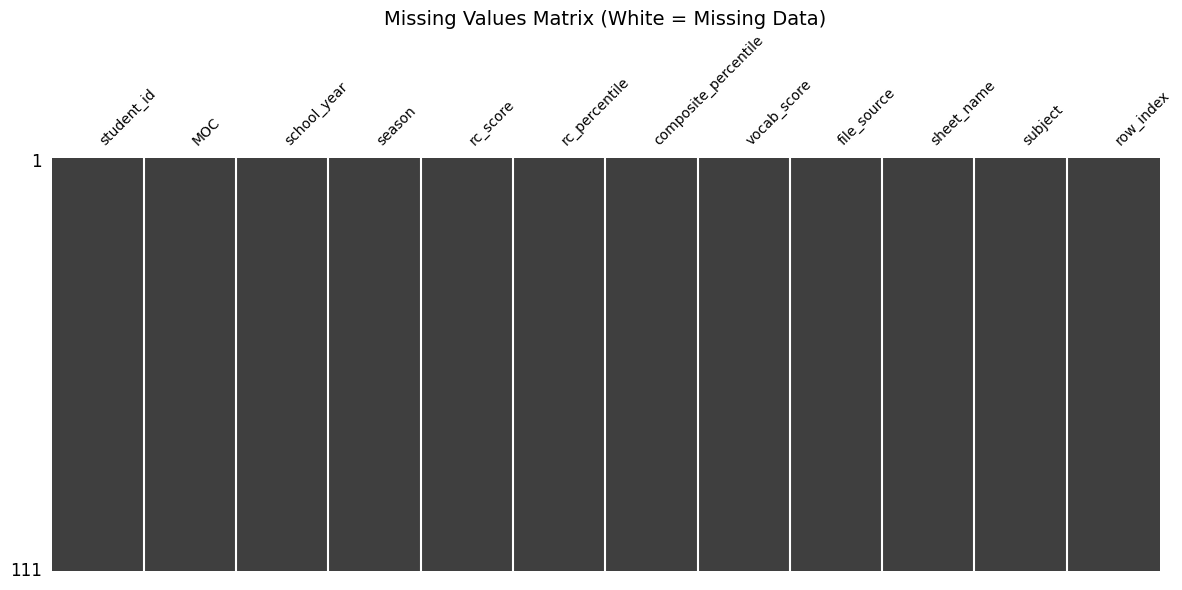

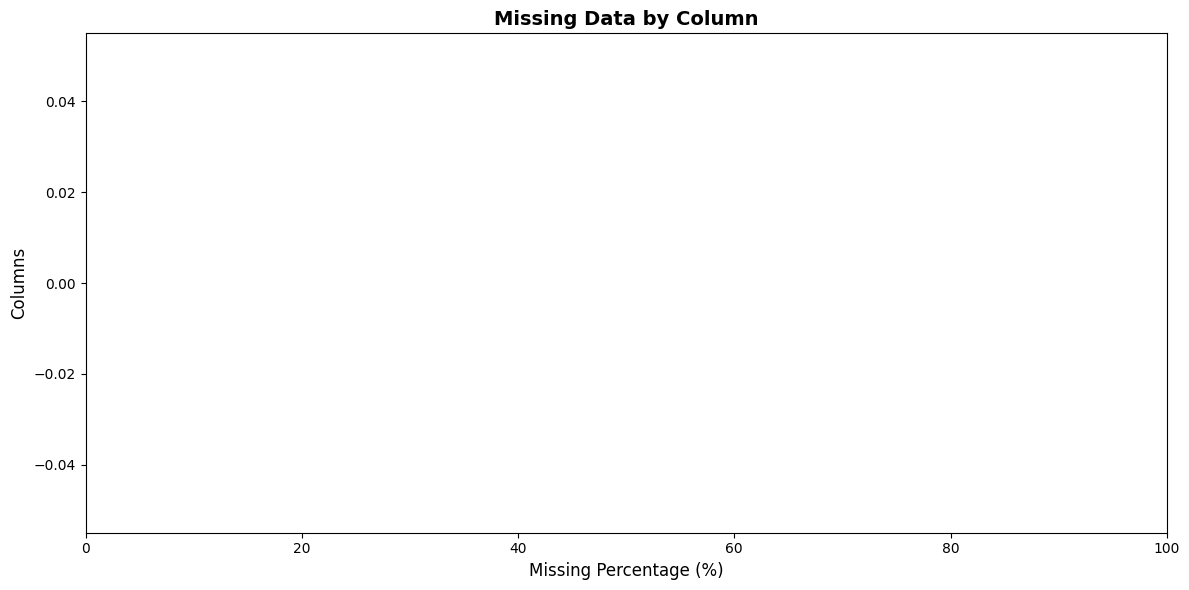

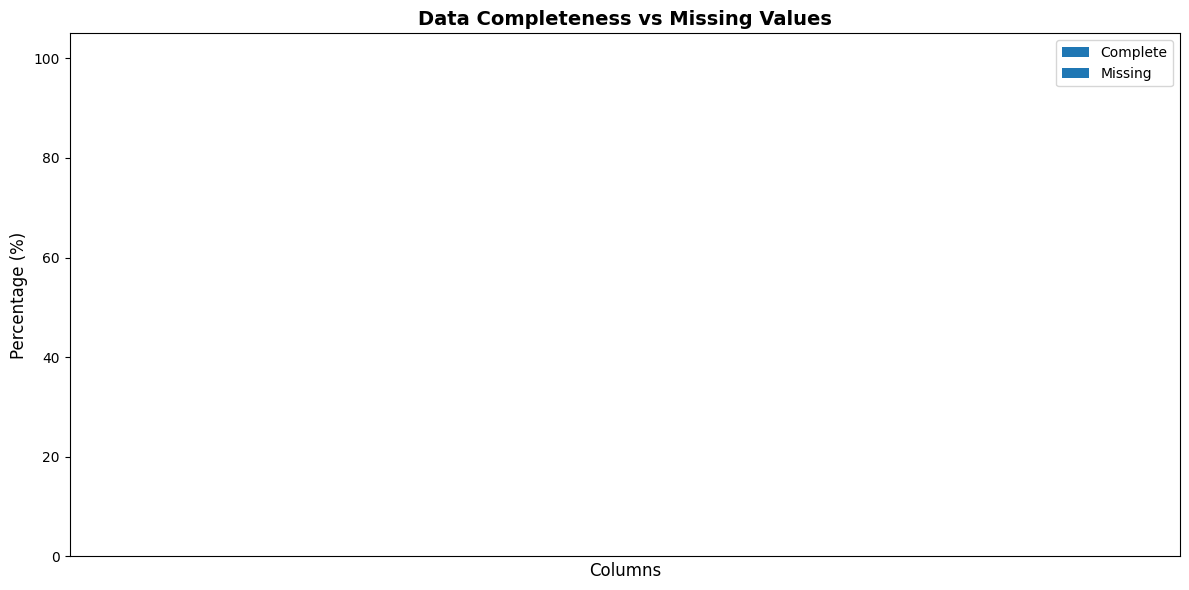

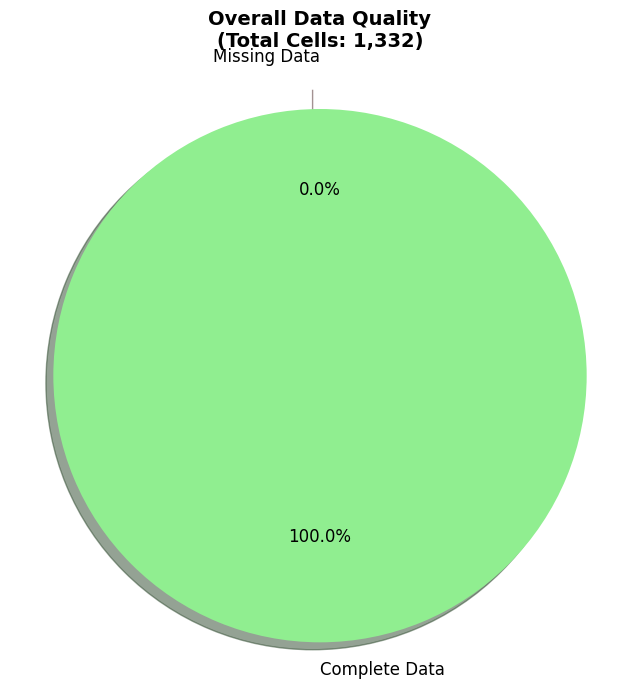


                   MISSING VALUES SUMMARY                   
Column                         Missing    Percent   
------------------------------------------------------------
Total Missing Cells: 0 out of 1,332 (0.00%)


In [206]:
# More understandable missing values visualizations for df_edu

# 1. MATRIX PLOT (Most understandable - shows every row and column)
import missingno as msno

plt.figure(figsize=(12, 6))
msno.matrix(df_edu, figsize=(12, 6), fontsize=10, sparkline=False)
plt.title('Missing Values Matrix (White = Missing Data)', fontsize=14)
plt.tight_layout()
plt.show()

# 2. BAR CHART (Percentage by column)
plt.figure(figsize=(12, 6))
missing_counts = df_edu.isnull().sum()
missing_percent = (missing_counts / len(df_edu)) * 100
missing_data = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percent': missing_percent.values
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=True)

# Horizontal bar chart
bars = plt.barh(missing_data['Column'], missing_data['Missing_Percent'], color='coral')
plt.xlabel('Missing Percentage (%)', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.title('Missing Data by Column', fontsize=14, fontweight='bold')
plt.xlim(0, 100)

# Add percentage values to each bar
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 3. GROUPED BAR CHART (Complete vs Missing)
plt.figure(figsize=(12, 6))
missing_data['Complete_Percent'] = 100 - missing_data['Missing_Percent']

x = range(len(missing_data))
width = 0.35

plt.bar([i - width/2 for i in x], missing_data['Complete_Percent'],
        width, label='Complete', color='lightgreen', alpha=0.8)
plt.bar([i + width/2 for i in x], missing_data['Missing_Percent'],
        width, label='Missing', color='salmon', alpha=0.8)

plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Data Completeness vs Missing Values', fontsize=14, fontweight='bold')
plt.xticks(x, missing_data['Column'], rotation=45, ha='right')
plt.legend()
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

# 4. PIE CHART (Overall data status)
plt.figure(figsize=(8, 8))
total_cells = df_edu.shape[0] * df_edu.shape[1]
total_missing = df_edu.isnull().sum().sum()
total_complete = total_cells - total_missing

sizes = [total_complete, total_missing]
labels = ['Complete Data', 'Missing Data']
colors = ['lightgreen', 'lightcoral']
explode = (0, 0.1)  # Highlight missing portion

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
plt.title(f'Overall Data Quality\n(Total Cells: {total_cells:,})',
          fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

# 5. DETAILED TABLE (Numerical summary)
print("\n" + "="*60)
print("MISSING VALUES SUMMARY".center(60))
print("="*60)
print(f"{'Column':<30} {'Missing':<10} {'Percent':<10}")
print("-"*60)
for _, row in missing_data.iterrows():
    print(f"{row['Column']:<30} {int(row['Missing_Count']):<10} {row['Missing_Percent']:<10.2f}%")
print("="*60)
print(f"Total Missing Cells: {total_missing:,} out of {total_cells:,} ({(total_missing/total_cells)*100:.2f}%)")

In [207]:
df_edu

,student_id,MOC,school_year,season,rc_score,rc_percentile,composite_percentile,vocab_score,file_source,sheet_name,subject,row_index
0,1024,1.1,2023-24,Winter,0.58,66.0,59.0,41.0,Hackathon_SY 23-24 Aimsweb Benchmark Data.xlsx,Winter 24 gr 6 reading,reading,22
1,1024,1.2,2023-24,Spring,0.71,71.0,63.0,34.0,Hackathon_SY 23-24 Aimsweb Benchmark Data.xlsx,Spring 24 Gr 6,reading,21
2,1024,2.0,2024-25,Fall,0.67,78.0,76.0,30.0,Hackathon SY 24-25 Aimsweb Benchmark Data (1) ...,Fall 24 Gr 7 reading,reading,23
3,1024,2.1,2024-25,Winter,0.50,62.0,72.0,60.0,Hackathon SY 24-25 Aimsweb Benchmark Data (1) ...,Winter 25 Gr 7 reading,reading,26
4,1024,2.2,2024-25,Spring,0.50,51.0,60.0,42.0,Hackathon SY 24-25 Aimsweb Benchmark Data (1) ...,Spring 25 Gr 7 reading,reading,22
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1108,1.2,2023-24,Spring,0.33,23.0,26.0,30.0,Hackathon_SY 23-24 Aimsweb Benchmark Data.xlsx,Spring 24 Gr 6,reading,14
107,1108,2.0,2024-25,Fall,0.38,22.0,8.0,30.0,Hackathon SY 24-25 Aimsweb Benchmark Data (1) ...,Fall 24 Gr 7 reading,reading,7
108,1108,2.1,2024-25,Winter,0.38,25.0,20.0,30.0,Hackathon SY 24-25 Aimsweb Benchmark Data (1) ...,Winter 25 Gr 7 reading,reading,13
109,1108,2.2,2024-25,Spring,0.21,7.0,51.0,94.0,Hackathon SY 24-25 Aimsweb Benchmark Data (1) ...,Spring 25 Gr 7 reading,reading,19


# STEP 4: Duplicate Detection

In [209]:
print("\n=== DUPLICATE ANALYSIS ===")

# Total duplicates
total_duplicates = df_edu.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates}")

if total_duplicates > 0:
    print(f"⚠️ Found {total_duplicates} duplicate rows ({total_duplicates/len(df_edu)*100:.2f}%)")

    # Show duplicate rows
    print("\n=== SAMPLE DUPLICATE ROWS ===")
    print(df_edu[df_edu.duplicated(keep=False)].head(10))
else:
    print("✅ No duplicate rows found!")


=== DUPLICATE ANALYSIS ===
Total duplicate rows: 0
✅ No duplicate rows found!


# STEP 5: Data Type Issues


In [210]:
print("\n=== DATA TYPE ANALYSIS ===")

for col in df_edu.columns:
    print(f"\n--- {col} ---")
    print(f"Type: {df_edu[col].dtype}")
    print(f"Unique values: {df_edu[col].nunique()}")
    print(f"Sample values: {df_edu[col].head(3).tolist()}")


=== DATA TYPE ANALYSIS ===

--- student_id ---
Type: int64
Unique values: 16
Sample values: [1024, 1024, 1024]

--- MOC ---
Type: float64
Unique values: 6
Sample values: [1.1, 1.2, 2.0]

--- school_year ---
Type: object
Unique values: 3
Sample values: ['2023-24', '2023-24', '2024-25']

--- season ---
Type: object
Unique values: 3
Sample values: ['Winter', 'Spring', 'Fall']

--- rc_score ---
Type: float64
Unique values: 18
Sample values: [0.58, 0.71, 0.67]

--- rc_percentile ---
Type: float64
Unique values: 52
Sample values: [66.0, 71.0, 78.0]

--- composite_percentile ---
Type: float64
Unique values: 62
Sample values: [59.0, 63.0, 76.0]

--- vocab_score ---
Type: float64
Unique values: 44
Sample values: [41.0, 34.0, 30.0]

--- file_source ---
Type: object
Unique values: 3
Sample values: ['Hackathon_SY 23-24 Aimsweb Benchmark Data.xlsx', 'Hackathon_SY 23-24 Aimsweb Benchmark Data.xlsx', 'Hackathon SY 24-25 Aimsweb Benchmark Data (1) (1).xlsx']

--- sheet_name ---
Type: object
Unique va

# TEP 6: Outlier Detection (for Numerical Columns)

In [211]:
print("\n=== OUTLIER DETECTION ===")

numerical_cols = df_edu.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    Q1 = df_edu[col].quantile(0.25)
    Q3 = df_edu[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_edu[(df_edu[col] < lower_bound) | (df_edu[col] > upper_bound)]

    if len(outliers) > 0:
        print(f"\n{col}:")
        print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df_edu)*100:.2f}%)")
        print(f"  Range: [{df_edu[col].min():.2f}, {df_edu[col].max():.2f}]")
        print(f"  Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")


=== OUTLIER DETECTION ===

vocab_score:
  Outliers: 54 (48.65%)
  Range: [2.00, 99.00]
  Normal range: [28.50, 32.50]


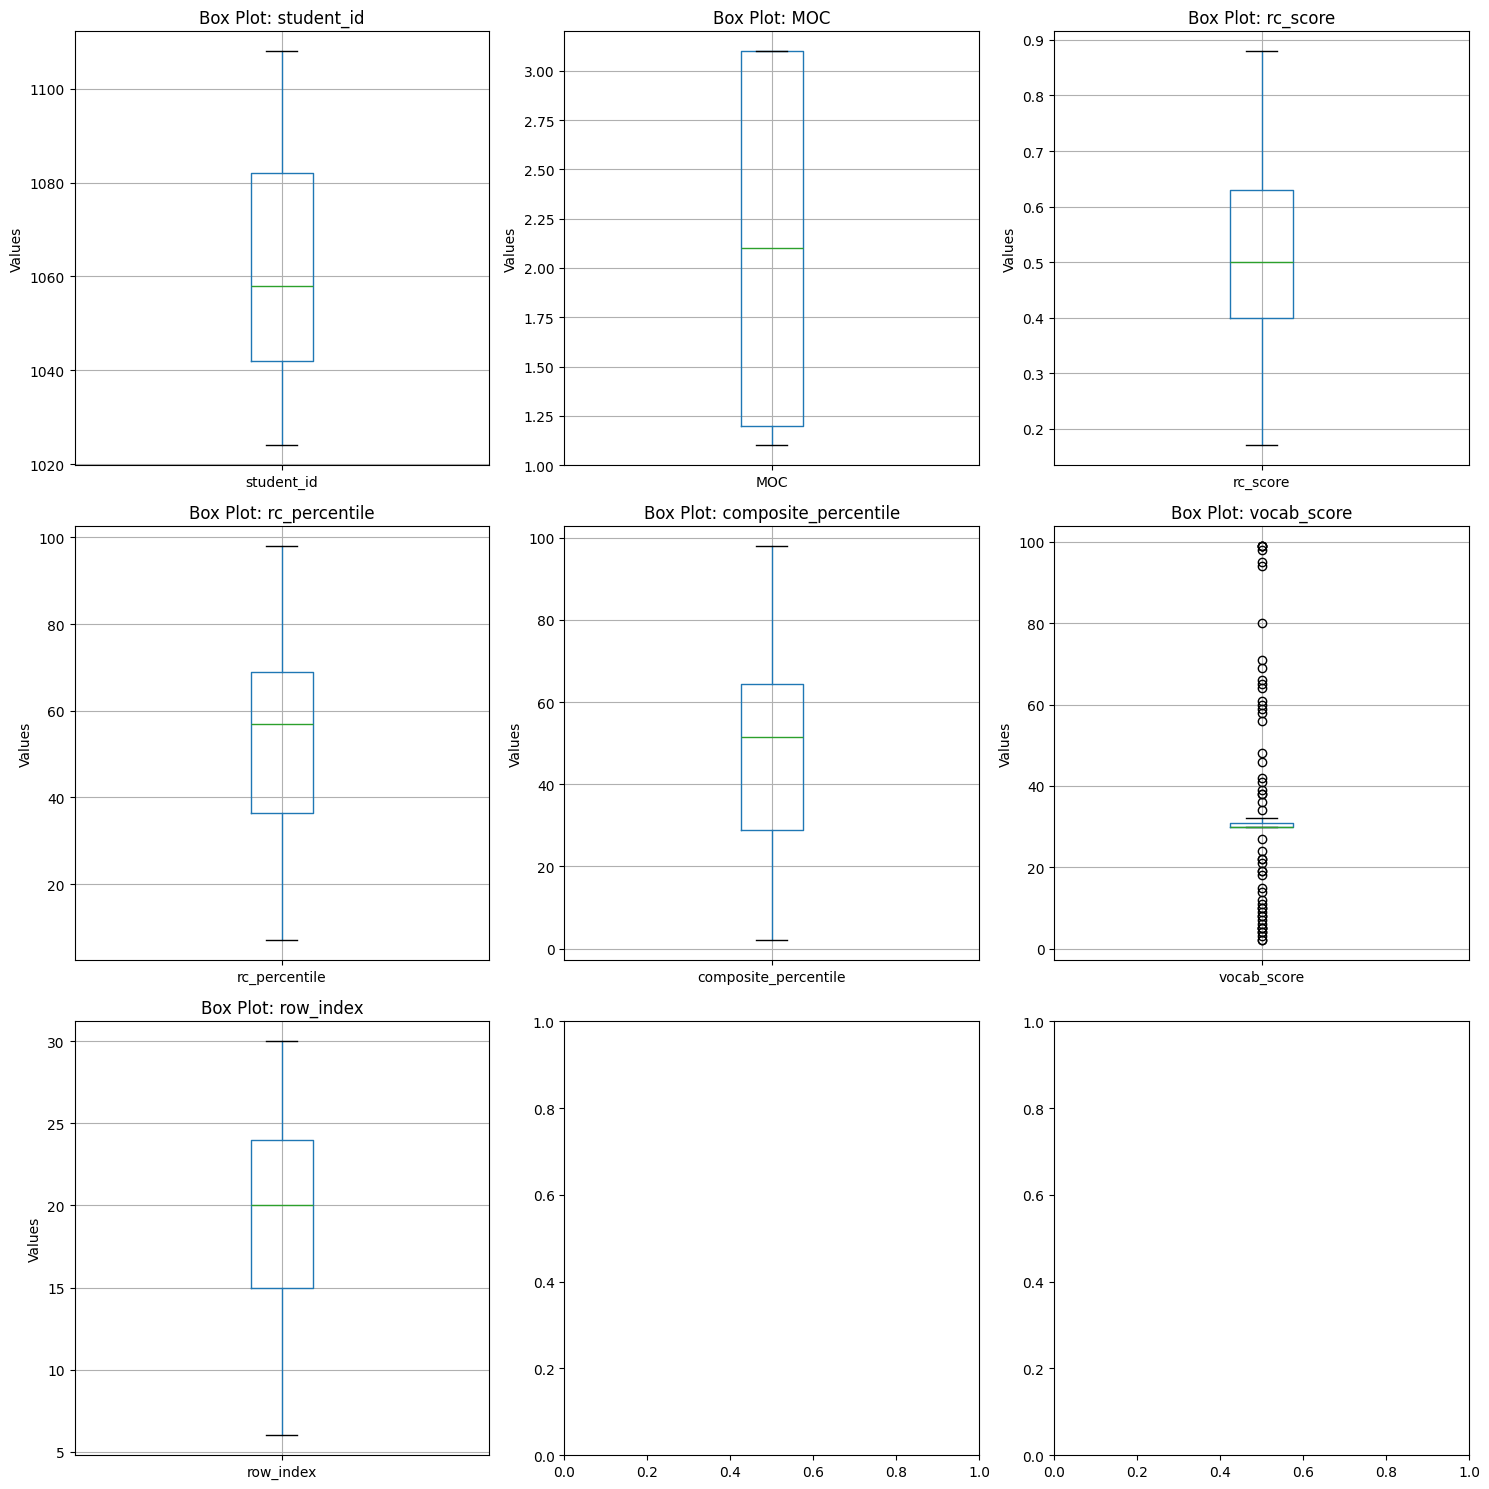

In [212]:
# Box plots for numerical columns
numerical_cols = df_edu.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 0:
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(numerical_cols) > 1 else [axes]

    for idx, col in enumerate(numerical_cols):
        df_edu.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Box Plot: {col}')
        axes[idx].set_ylabel('Values')

    plt.tight_layout()
    plt.show()

# STEP 7: Categorical Data Analysis

In [214]:
print("\n=== CATEGORICAL COLUMNS ANALYSIS ===")

categorical_cols = df_edu.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Unique values: {df_edu[col].nunique()}")
    print(f"Most common:")
    print(df_edu[col].value_counts().head(10))


=== CATEGORICAL COLUMNS ANALYSIS ===

--- school_year ---
Unique values: 3
Most common:
school_year
2024-25    64
2023-24    32
2025-26    15
Name: count, dtype: int64

--- season ---
Unique values: 3
Most common:
season
Fall      47
Winter    32
Spring    32
Name: count, dtype: int64

--- file_source ---
Unique values: 3
Most common:
file_source
Hackathon_SY 23-24 Aimsweb Benchmark Data.xlsx            48
Hackathon SY 24-25 Aimsweb Benchmark Data (1) (1).xlsx    48
Hackathon_Fall 2025 Aimsweb Benchmark Data (1).xlsx       15
Name: count, dtype: int64

--- sheet_name ---
Unique values: 7
Most common:
sheet_name
Winter 24 gr 6 reading    16
Spring 24 Gr 6            16
Fall 24 Gr 7 reading      16
Winter 25 Gr 7 reading    16
Spring 25 Gr 7 reading    16
Fall 23 Gr 6 Reading      16
Gr 8 Reading              15
Name: count, dtype: int64

--- subject ---
Unique values: 1
Most common:
subject
reading    111
Name: count, dtype: int64


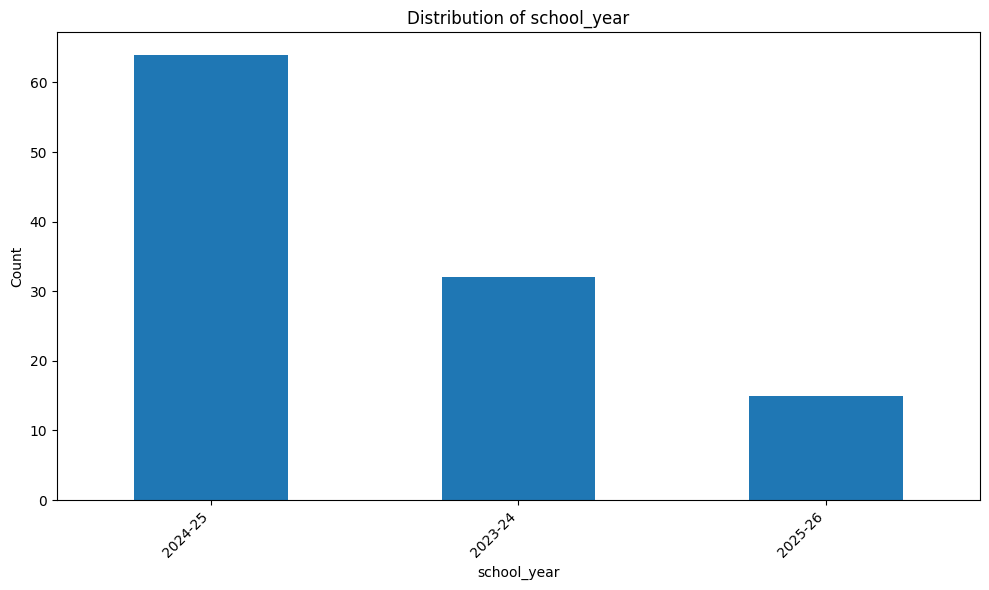

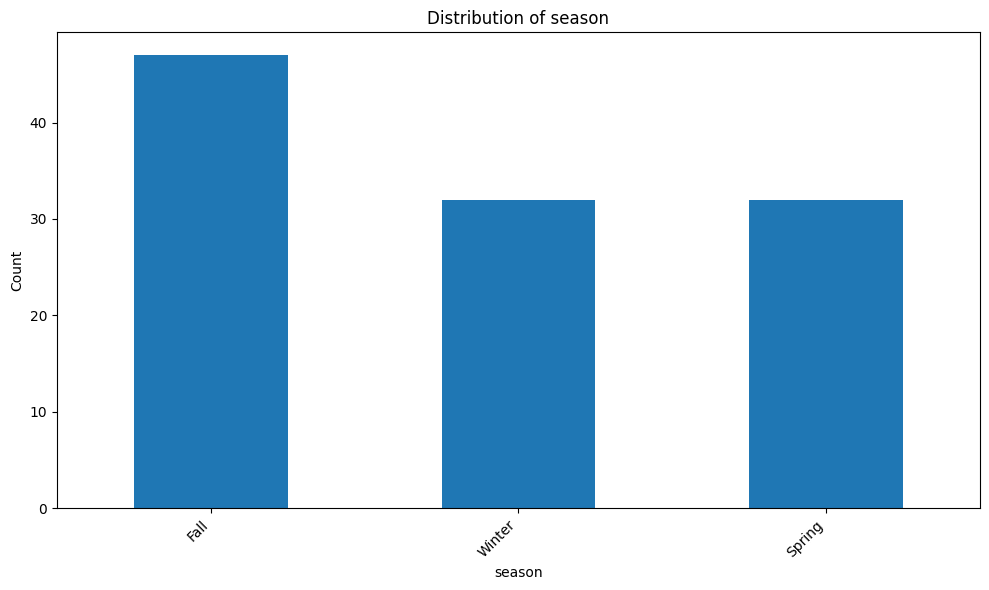

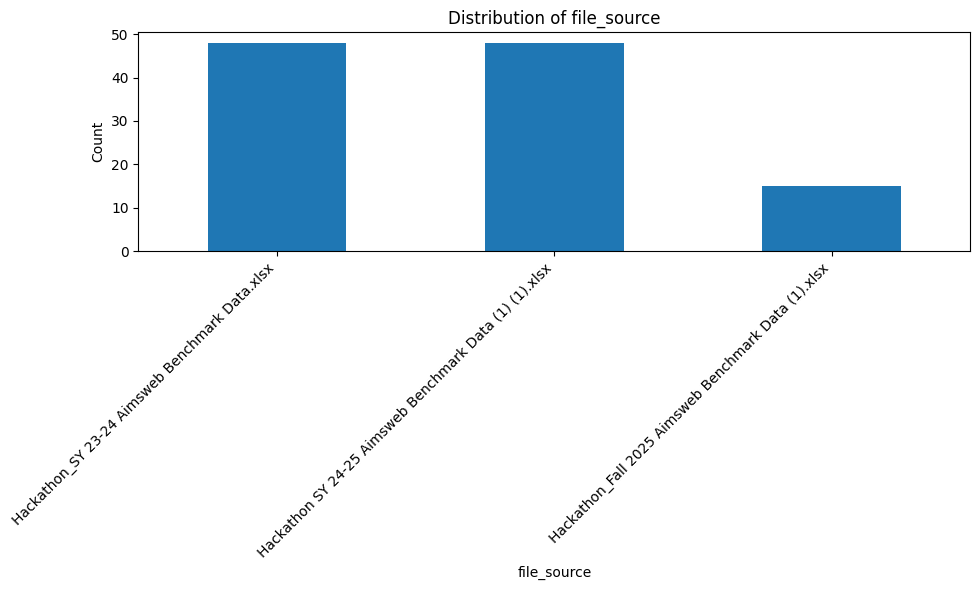

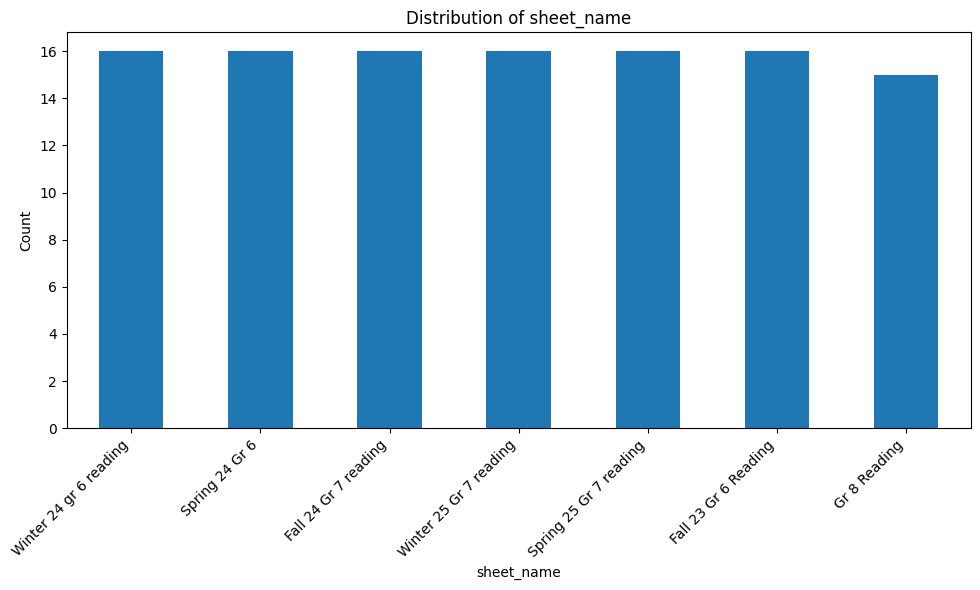

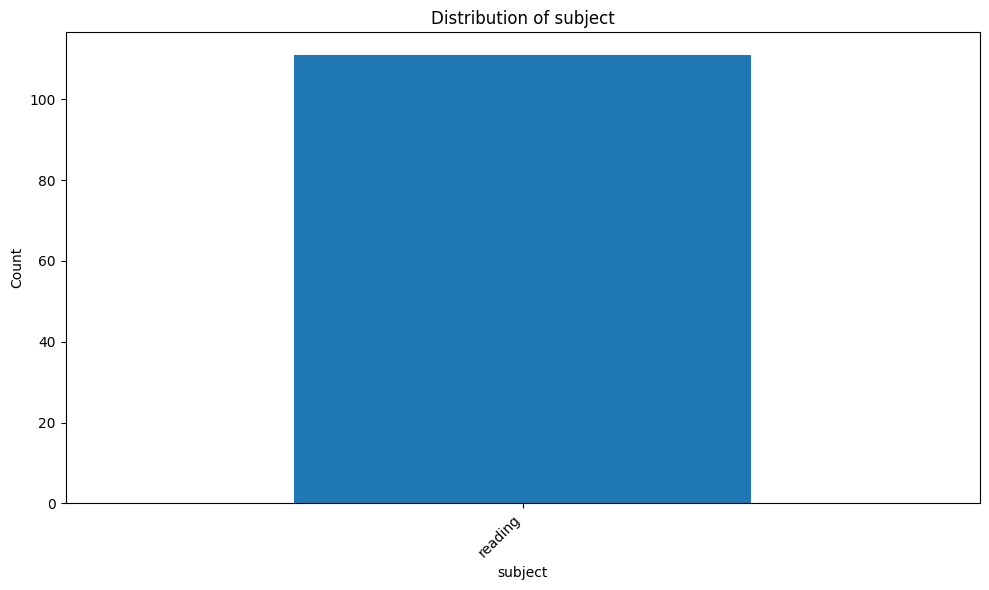

In [177]:
# Bar plots for categorical columns
categorical_cols = df_edu.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df_edu[col].nunique() <= 20:  # Only plot if <= 20 unique values
        plt.figure(figsize=(10, 6))
        df_edu[col].value_counts().head(15).plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# STEP 8: Distribution Analysis

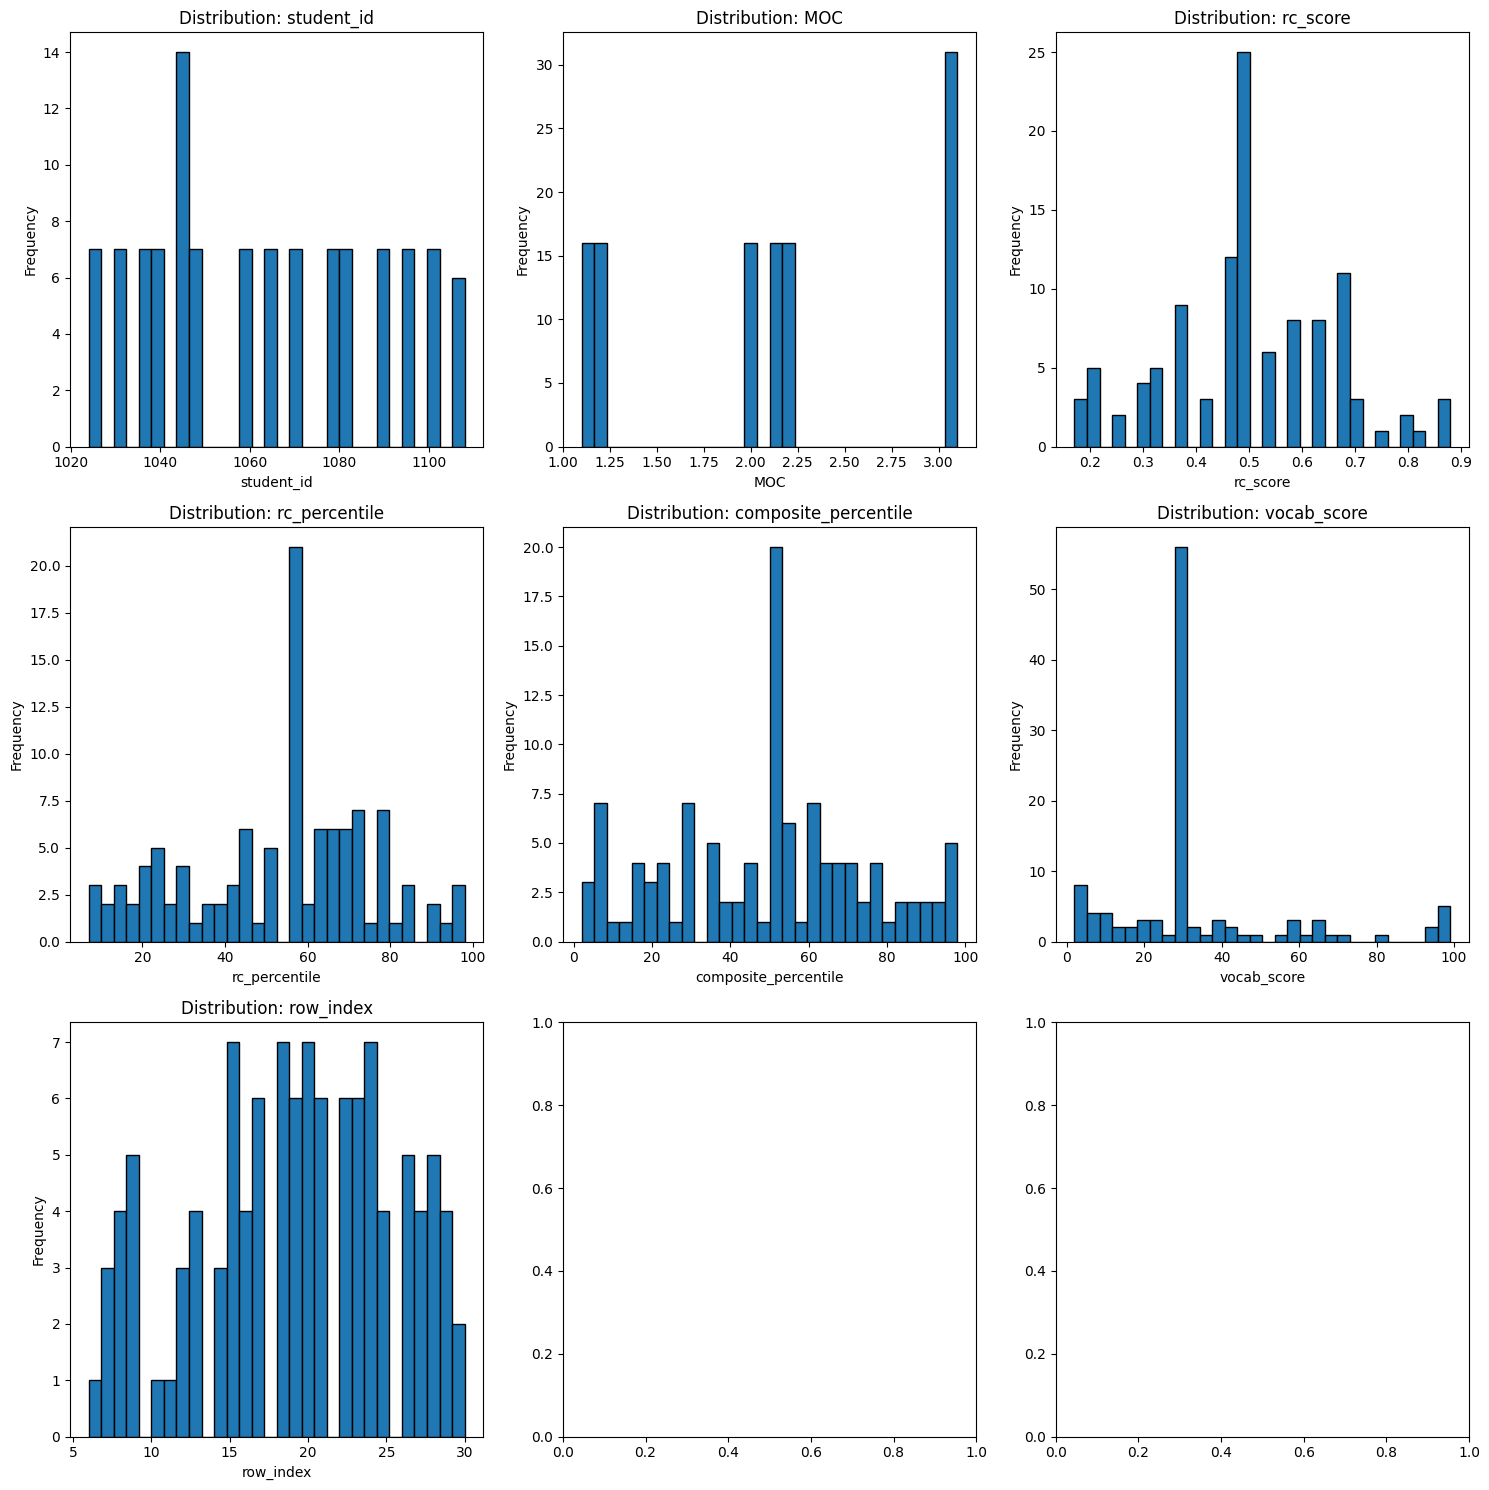

In [215]:
# Histograms
numerical_cols = df_edu.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 0:
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(numerical_cols) > 1 else [axes]

    for idx, col in enumerate(numerical_cols):
        axes[idx].hist(df_edu[col].dropna(), bins=30, edgecolor='black')
        axes[idx].set_title(f'Distribution: {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


=== CORRELATION ANALYSIS ===


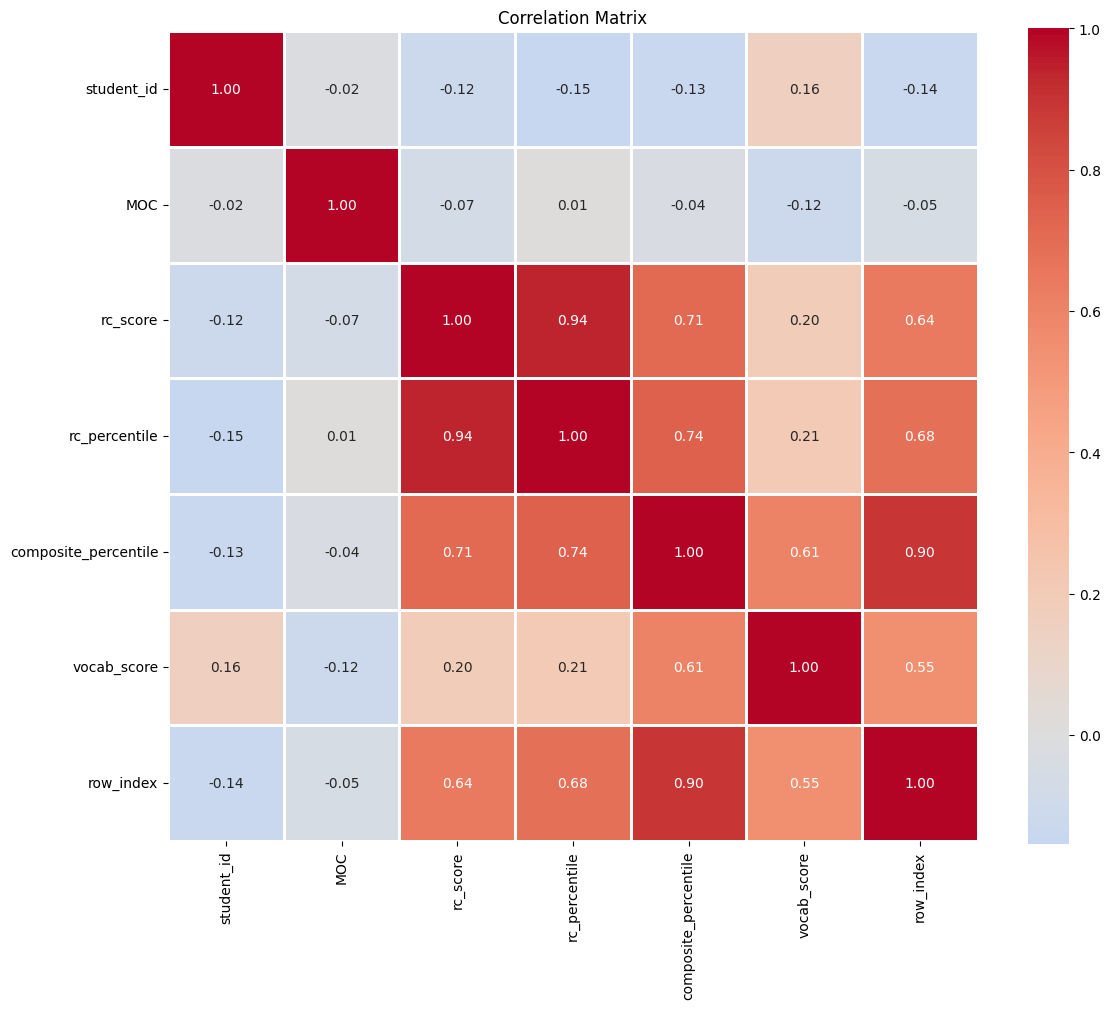


=== STRONG CORRELATIONS (> 0.7) ===
rc_score <-> rc_percentile: 0.938
rc_score <-> composite_percentile: 0.712
rc_percentile <-> composite_percentile: 0.744
composite_percentile <-> row_index: 0.895


In [218]:
print("\n=== CORRELATION ANALYSIS ===")

numerical_cols = df_edu.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 1:
    correlation_matrix = df_edu[numerical_cols].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

    # Find strong correlations
    print("\n=== STRONG CORRELATIONS (> 0.7) ===")
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")

In [220]:
print("\n" + "="*60)
print("DATA CLEANING CHECKLIST")
print("="*60)

# Create a cleaning plan
cleaning_plan = {
    "Missing Values": [],
    "Duplicates": [],
    "Data Types": [],
    "Outliers": [],
    "Inconsistencies": []
}

# Check each issue
if df_edu.isnull().sum().sum() > 0:
    cleaning_plan["Missing Values"].append(f"Found {df_edu.isnull().sum().sum()} missing values")

if df_edu.duplicated().sum() > 0:
    cleaning_plan["Duplicates"].append(f"Found {df_edu.duplicated().sum()} duplicate rows")

# Print the plan
for category, issues in cleaning_plan.items():
    if issues:
        print(f"\n{category}:")
        for issue in issues:
            print(f"  ⚠️ {issue}")


DATA CLEANING CHECKLIST


# ML MODEL


STEP 1: CREATE TARGET VARIABLE (Performance Category)

Performance Category Distribution:
performance_category
Medium    77
High      18
Low       16
Name: count, dtype: int64

Percentages:
performance_category
Medium    69.369369
High      16.216216
Low       14.414414
Name: proportion, dtype: float64


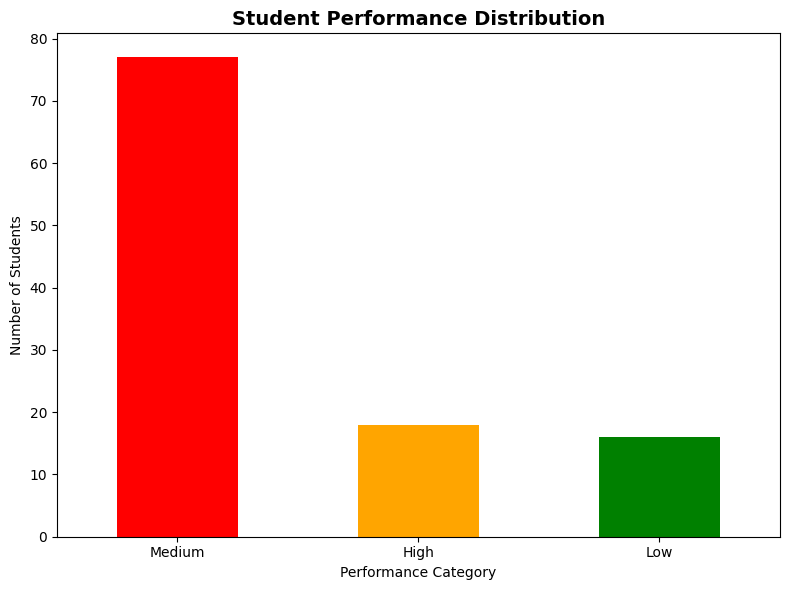


STEP 2: SELECT FEATURES

✅ Features (X): ['MOC', 'vocab_score', 'rc_score', 'composite_percentile', 'season_encoded', 'school_year_encoded']
✅ Target (y): performance_category

Dataset shape:
   X: (111, 6)
   y: (111,)

STEP 3: SPLIT DATA (80% Train, 20% Test)

✅ Training set: 88 samples
✅ Test set: 23 samples

STEP 4: SCALE FEATURES
✅ Features scaled using StandardScaler

STEP 5: TRAIN & EVALUATE MODELS

1️⃣ Logistic Regression...
   Accuracy: 0.8696 (86.96%) Kishan)

2️⃣ Decision Tree...
   Accuracy: 0.7391 (73.91%) Kishan)

3️⃣ Random Forest...
   Accuracy: 0.9130 (91.30%) Kishan)

4️⃣ K-Nearest Neighbors...
   Accuracy: 0.9130 (91.30%) Kishan)

5️⃣ Support Vector Machine...
   Accuracy: 0.8696 (86.96%) Kishan)

STEP 6: MODEL COMPARISON

📊 Model Performance Ranking:
              Model  Accuracy
      Random Forest  0.913043
                KNN  0.913043
Logistic Regression  0.869565
                SVM  0.869565
      Decision Tree  0.739130

🏆 BEST MODEL: Random Forest
   Accura

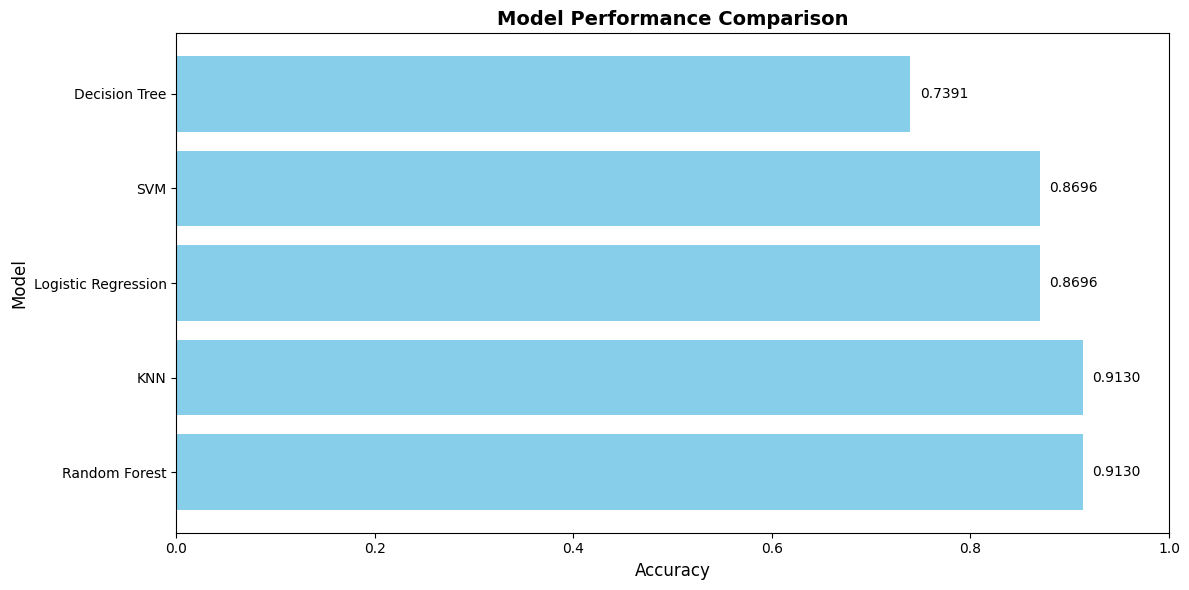


STEP 7: DETAILED EVALUATION - Random Forest

📋 Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       1.00      0.67      0.80         3
      Medium       0.89      1.00      0.94        16

    accuracy                           0.91        23
   macro avg       0.96      0.81      0.87        23
weighted avg       0.92      0.91      0.91        23


📊 Confusion Matrix:
[[ 3  0  1]
 [ 0  2  1]
 [ 0  0 16]]


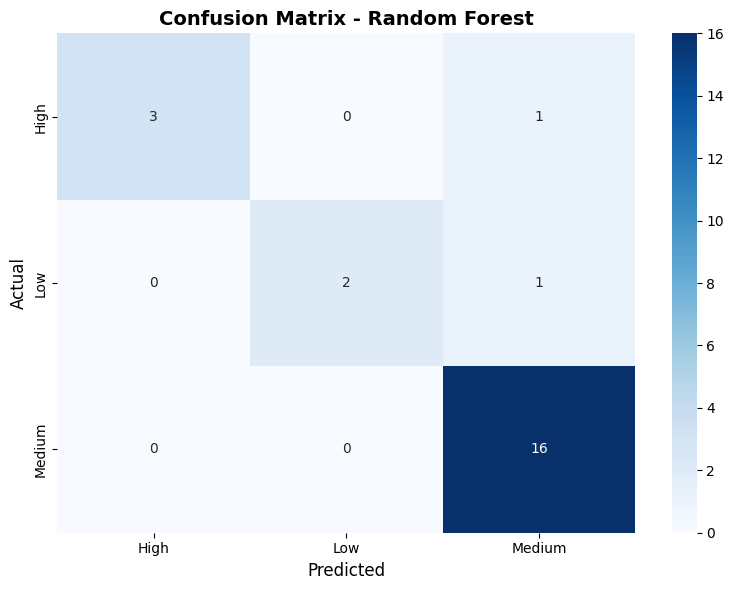


STEP 8: FEATURE IMPORTANCE

📊 Feature Importance:
             Feature  Importance
            rc_score    0.463980
composite_percentile    0.295694
         vocab_score    0.112277
                 MOC    0.059309
 school_year_encoded    0.038292
      season_encoded    0.030447


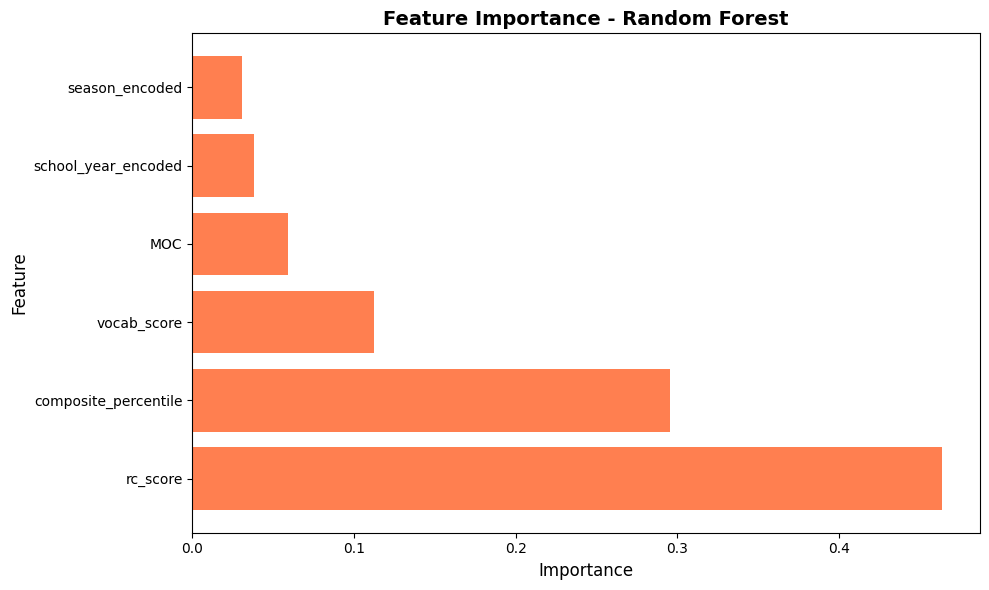


FINAL SUMMARY

✅ Problem: Student Performance Classification
✅ Dataset: 111 students
✅ Features: 6
✅ Classes: 3 (Low, Medium, High)

📊 RESULTS:
   • Best Model: Random Forest
   • Accuracy: 0.9130 (91.30%)
   • Training samples: 88
   • Test samples: 23

🎯 NEXT STEPS:
   1. Try hyperparameter tuning
   2. Try different feature combinations
   3. Handle class imbalance if present
   4. Cross-validation for robust evaluation

✅ MACHINE LEARNING COMPLETE!


In [223]:
# ============================================================
# PROBLEM: Student Performance Classification
# GOAL: Predict if student is Low/Medium/High performer
# ============================================================

print("\n" + "="*70)
print("STEP 1: CREATE TARGET VARIABLE (Performance Category)")
print("="*70)

# Create performance categories based on rc_percentile
def categorize_performance(percentile):
    if percentile < 25:
        return 'Low'
    elif percentile < 75:
        return 'Medium'
    else:
        return 'High'

df_edu['performance_category'] = df_edu['rc_percentile'].apply(categorize_performance)

# Check distribution
print("\nPerformance Category Distribution:")
print(df_edu['performance_category'].value_counts())
print("\nPercentages:")
print(df_edu['performance_category'].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(8, 6))
df_edu['performance_category'].value_counts().plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Student Performance Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Performance Category')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ============================================================
# STEP 2: FEATURE SELECTION
# ============================================================
print("\n" + "="*70)
print("STEP 2: SELECT FEATURES")
print("="*70)

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select features (X) and target (y)
feature_cols = ['MOC', 'vocab_score', 'rc_score', 'composite_percentile']

# Encode categorical variables if needed
# For season
df_edu['season_encoded'] = LabelEncoder().fit_transform(df_edu['season'])
feature_cols.append('season_encoded')

# For school_year
df_edu['school_year_encoded'] = LabelEncoder().fit_transform(df_edu['school_year'])
feature_cols.append('school_year_encoded')

X = df_edu[feature_cols]
y = df_edu['performance_category']

print(f"\n✅ Features (X): {feature_cols}")
print(f"✅ Target (y): performance_category")
print(f"\nDataset shape:")
print(f"   X: {X.shape}")
print(f"   y: {y.shape}")

# ============================================================
# STEP 3: TRAIN-TEST SPLIT
# ============================================================
print("\n" + "="*70)
print("STEP 3: SPLIT DATA (80% Train, 20% Test)")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✅ Training set: {X_train.shape[0]} samples")
print(f"✅ Test set: {X_test.shape[0]} samples")

# ============================================================
# STEP 4: FEATURE SCALING
# ============================================================
print("\n" + "="*70)
print("STEP 4: SCALE FEATURES")
print("="*70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")

# ============================================================
# STEP 5: TRAIN MULTIPLE MODELS
# ============================================================
print("\n" + "="*70)
print("STEP 5: TRAIN & EVALUATE MODELS")
print("="*70)

# Dictionary to store results
results = {}

# Model 1: Logistic Regression
print("\n1️⃣ Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)
results['Logistic Regression'] = lr_acc
print(f"   Accuracy: {lr_acc:.4f} ({lr_acc*100:.2f}%) Kishan)")

# Model 2: Decision Tree
print("\n2️⃣ Decision Tree...")
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
results['Decision Tree'] = dt_acc
print(f"   Accuracy: {dt_acc:.4f} ({dt_acc*100:.2f}%) Kishan)")

# Model 3: Random Forest
print("\n3️⃣ Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
results['Random Forest'] = rf_acc
print(f"   Accuracy: {rf_acc:.4f} ({rf_acc*100:.2f}%) Kishan)")

# Model 4: K-Nearest Neighbors
print("\n4️⃣ K-Nearest Neighbors...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred)
results['KNN'] = knn_acc
print(f"   Accuracy: {knn_acc:.4f} ({knn_acc*100:.2f}%) Kishan)")

# Model 5: Support Vector Machine
print("\n5️⃣ Support Vector Machine...")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
results['SVM'] = svm_acc
print(f"   Accuracy: {svm_acc:.4f} ({svm_acc*100:.2f}%) Kishan)")

# ============================================================
# STEP 6: COMPARE MODELS
# ============================================================
print("\n" + "="*70)
print("STEP 6: MODEL COMPARISON")
print("="*70)

# Create results dataframe
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values())
}).sort_values('Accuracy', ascending=False)

print("\n📊 Model Performance Ranking:")
print(results_df.to_string(index=False))

# Find best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%) Kishan)")

# Visualize comparison
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xlim(0, 1)

# Add accuracy values on bars
for i, v in enumerate(results_df['Accuracy']):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================
# STEP 7: DETAILED EVALUATION OF BEST MODEL
# ============================================================
print("\n" + "="*70)
print(f"STEP 7: DETAILED EVALUATION - {best_model_name}")
print("="*70)

# Get predictions from best model
if best_model_name == 'Random Forest':
    best_pred = rf_pred
    best_model = rf_model
elif best_model_name == 'Decision Tree':
    best_pred = dt_pred
    best_model = dt_model
elif best_model_name == 'Logistic Regression':
    best_pred = lr_pred
    best_model = lr_model
elif best_model_name == 'KNN':
    best_pred = knn_pred
    best_model = knn_model
else:
    best_pred = svm_pred
    best_model = svm_model

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, best_pred))

# Confusion Matrix
print("\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, best_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

# ============================================================
# STEP 8: FEATURE IMPORTANCE (if applicable)
# ============================================================
if best_model_name in ['Random Forest', 'Decision Tree']:
    print("\n" + "="*70)
    print("STEP 8: FEATURE IMPORTANCE")
    print("="*70)

    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("\n📊 Feature Importance:")
    print(feature_importance_df.to_string(index=False))

    # Visualize
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='coral')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# ============================================================
# FINAL SUMMARY
# ============================================================
print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"""
✅ Problem: Student Performance Classification
✅ Dataset: {len(df_edu)} students
✅ Features: {len(feature_cols)}
✅ Classes: {df_edu['performance_category'].nunique()} (Low, Medium, High)

📊 RESULTS:
   • Best Model: {best_model_name}
   • Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)
   • Training samples: {len(X_train)}
   • Test samples: {len(X_test)}

🎯 NEXT STEPS:
   1. Try hyperparameter tuning
   2. Try different feature combinations
   3. Handle class imbalance if present
   4. Cross-validation for robust evaluation
""")

print("="*70)
print("✅ MACHINE LEARNING COMPLETE!")
print("="*70)